# Twitter NLP Project

The purpose of this project is to predict the emotional sentiment of a tweet (positive or negative) using natural language processing and machine learning. The subject of the tweets used in this project surround a SXSW event. 

## Import Libraries for EDA and Preprocessing

In [174]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd

from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from matplotlib import cm
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mered\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mered\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mered\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Import data and begin EDA

In [175]:
df = pd.read_csv('Twitter_Data.csv', encoding= 'unicode_escape')

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\pandas\io\parsers.py:2059: DeprecationWarning: invalid escape sequence '\ '
  data = self._reader.read(nrows)
C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\pandas\io\parsers.py:2059: DeprecationWarning: invalid escape sequence '\ '
  data = self._reader.read(nrows)
C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\pandas\io\parsers.py:2059: DeprecationWarning: invalid escape sequence '\('
  data = self._reader.read(nrows)


In [176]:
df.head(9)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion


In [177]:
df.shape


(9093, 3)

In [178]:
## Drop unecessary column
df.drop(['emotion_in_tweet_is_directed_at'], axis=1, inplace= True) 

In [179]:
## Drop null values
df.dropna( inplace = True) 

In [180]:
df.head(9)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Positive emotion


In [181]:
## Rename the columns
df.rename(columns = {'tweet_text': 'tweet','is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, inplace = True)

In [182]:
df.head()

,tweet,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [183]:
df.emotion.value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

In [184]:
## replace target column values with numbers
df.replace({'Negative emotion': 0, 'Positive emotion': 1}, inplace = True)

In [185]:
df.head()

,tweet,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,1
2,@swonderlin Can not wait for #iPad 2 also. The...,1
3,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1


In [186]:
df.emotion.value_counts()

No emotion toward brand or product    5388
1                                     2978
0                                      570
I can't tell                           156
Name: emotion, dtype: int64

In [187]:
#Remove non relevant column labels
df = df[df.emotion != "I can't tell"]

In [188]:
df = df[df.emotion != "No emotion toward brand or product"]

In [189]:
df.emotion.value_counts()

1    2978
0     570
Name: emotion, dtype: int64

In [190]:
data = df.tweet
target = df.emotion

# Begin Preprocessing Words

In [191]:
## Create stopwords list with english and punctuation
import string
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``','@','#','\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob',"'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk']

In [192]:
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [193]:
## tokenize tweets and remove stopwords
def process_article(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed    

In [194]:
processed_data = list(map(process_article, data))

In [195]:
processed_data

[['wesley83',
  '3g',
  'iphone',
  '3',
  'hrs',
  'tweeting',
  'rise_austin',
  'dead',
  'need',
  'upgrade',
  'plugin',
  'stations',
  'sxsw'],
 ['jessedee',
  'know',
  'fludapp',
  'awesome',
  'ipad/iphone',
  'app',
  'likely',
  'appreciate',
  'design',
  'also',
  'giving',
  'free',
  'ts',
  'sxsw'],
 ['swonderlin', 'wait', 'ipad', '2', 'also', 'sale', 'sxsw'],
 ['sxsw',
  'hope',
  'year',
  'festival',
  'crashy',
  'year',
  'iphone',
  'app',
  'sxsw'],
 ['sxtxstate',
  'great',
  'stuff',
  'fri',
  'sxsw',
  'marissa',
  'mayer',
  'google',
  'tim',
  "o'reilly",
  'tech',
  'books/conferences',
  'amp',
  'matt',
  'mullenweg',
  'wordpress'],
 ['sxsw',
  'starting',
  'ctia',
  'around',
  'corner',
  'googleio',
  'hop',
  'skip',
  'jump',
  'good',
  'time',
  'android',
  'fan'],
 ['beautifully',
  'smart',
  'simple',
  'idea',
  'rt',
  'madebymany',
  'thenextweb',
  'wrote',
  'hollergram',
  'ipad',
  'app',
  'sxsw'],
 ['counting',
  'days',
  'sxsw',

In [196]:
articles_concat = []
for article in processed_data:
    articles_concat += article

In [197]:
## find overall word frequencies for both emotions and plot for visualization
articles_freqdist = FreqDist(articles_concat)
articles_freqdist.most_common(200)

[('sxsw', 3684),
 ('mention', 2507),
 ('link', 1319),
 ('ipad', 1190),
 ('rt', 1074),
 ('apple', 1044),
 ('google', 861),
 ('iphone', 684),
 ('quot', 639),
 ('store', 588),
 ('2', 554),
 ('app', 456),
 ('new', 402),
 ('austin', 318),
 ('amp', 233),
 ('android', 222),
 ('ipad2', 222),
 ('launch', 182),
 ('get', 181),
 ('one', 169),
 ('pop-up', 164),
 ('social', 155),
 ('like', 153),
 ('circles', 150),
 ('time', 146),
 ('line', 146),
 ('great', 145),
 ('party', 137),
 ('via', 134),
 ("'m", 132),
 ('today', 131),
 ('free', 127),
 ('cool', 124),
 ('day', 116),
 ('maps', 114),
 ('apps', 113),
 ('people', 110),
 ('mobile', 108),
 ('go', 108),
 ('sxswi', 107),
 ('good', 105),
 ('network', 103),
 ('got', 99),
 ('love', 98),
 ('awesome', 96),
 ('temporary', 94),
 ('opening', 91),
 ('downtown', 89),
 ('w/', 88),
 ('see', 86),
 ('need', 85),
 ('check', 81),
 ('going', 80),
 ('thanks', 80),
 ('even', 80),
 ('popup', 78),
 ('called', 77),
 ('mayer', 76),
 ('first', 75),
 ('open', 74),
 ('major', 73

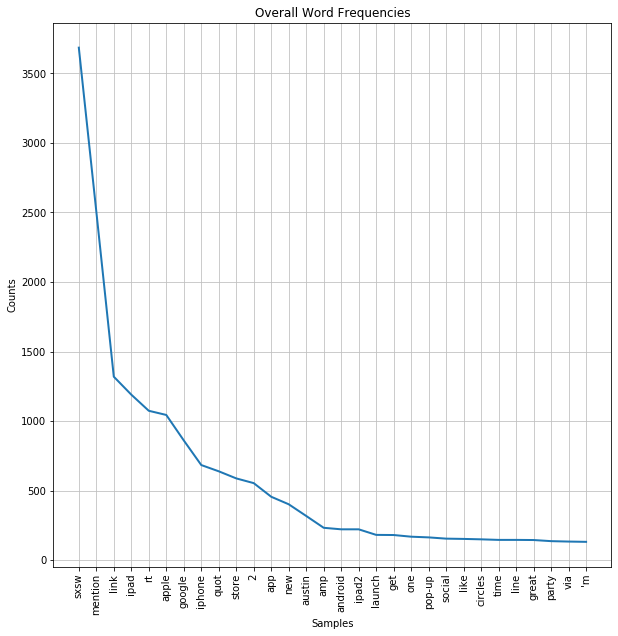

In [198]:
plt.figure(figsize=(10,10))
plt.title('Overall Word Frequencies')
articles_freqdist.plot(30)

## Create lemmatized data and create dataframe to be used for modeling

In [199]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [200]:
Data = {'tweet':lemmatized_output, 'emotion':target}
df3 = pd.DataFrame(Data)

In [201]:
df3.head()

,tweet,emotion
0,wesley83 3g iphone 3 hr tweeting rise_austin d...,0
1,jessedee know fludapp awesome ipad/iphone app ...,1
2,swonderlin wait ipad 2 also sale sxsw,1
3,sxsw hope year festival crashy year iphone app...,0
4,sxtxstate great stuff fri sxsw marissa mayer g...,1


In [202]:
df3.to_csv('Cleaned_data.csv', index=False)

# Continue EDA

## Find word frequencies for each emotion and plot

In [203]:
df_freq_neg = df[df['emotion']==0]
df_freq_pos = df[df['emotion']==1]

In [204]:
data_neg = df_freq_neg['tweet']
data_pos = df_freq_pos['tweet']

In [205]:
pros_neg = list(map(process_article, data_neg))
pros_pos = list(map(process_article, data_pos))

In [206]:
total_vocab_neg = set()
for comment in pros_neg:
    total_vocab_neg.update(comment)
len(total_vocab_neg)

2126

In [207]:
total_vocab_pos = set()
for comment in pros_pos:
    total_vocab_pos.update(comment)
len(total_vocab_pos)

5395

In [208]:
flat_neg = [item for sublist in pros_neg for item in sublist]
flat_pos = [item for sublist in pros_pos for item in sublist]

In [209]:
neg_freq = FreqDist(flat_neg)
pos_freq = FreqDist(flat_pos)

In [210]:
neg_freq.most_common(20)

[('sxsw', 581),
 ('mention', 313),
 ('ipad', 188),
 ('quot', 175),
 ('iphone', 161),
 ('google', 145),
 ('rt', 137),
 ('apple', 120),
 ('link', 102),
 ('2', 64),
 ('app', 60),
 ('store', 46),
 ('new', 43),
 ('like', 39),
 ('circles', 34),
 ('social', 31),
 ('apps', 30),
 ('people', 29),
 ('design', 28),
 ('need', 25)]

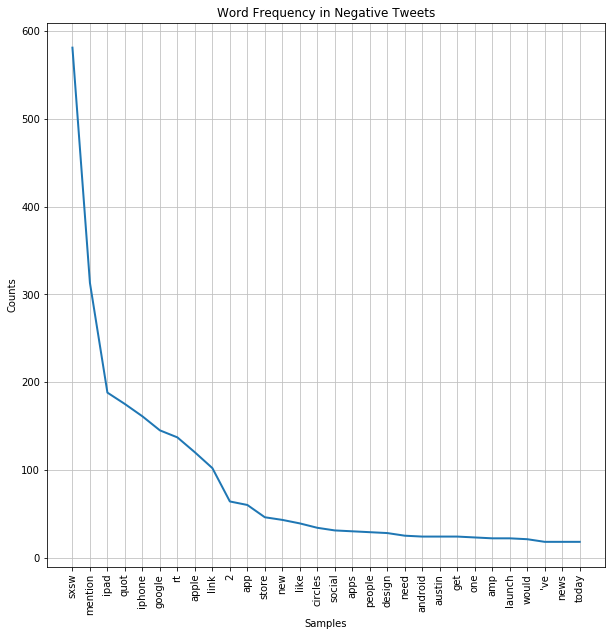

In [211]:
plt.figure(figsize=(10,10))
plt.title('Word Frequency in Negative Tweets')
neg_freq.plot(30)

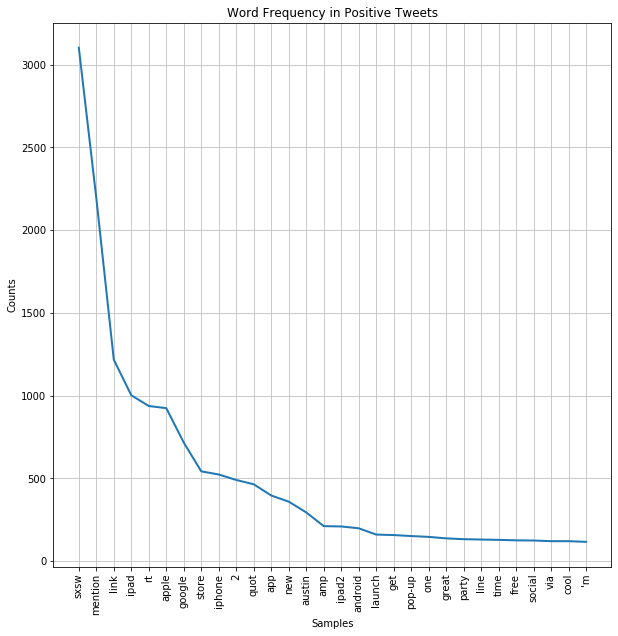

In [212]:
plt.figure(figsize=(10,10))
plt.title('Word Frequency in Positive Tweets')
pos_freq.plot(30)

Due to the subject matter of the tweets, it is clear that both emotions share many of the same words

## Compare normalized frequencies

In [213]:
pos_total_word_count = sum(pos_freq.values())
pos_top_25 = pos_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in pos_top_25:
    normalized_frequency_pos = word[1]/pos_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency_pos))

Word 		 Normalized Frequency

sxsw 		 0.083
mention 		 0.05869
link 		 0.03255
ipad 		 0.0268
rt 		 0.02506
apple 		 0.02472
google 		 0.01915
store 		 0.0145
iphone 		 0.01399
2 		 0.01311
quot 		 0.01241
app 		 0.01059
new 		 0.009603
austin 		 0.007864
amp 		 0.005644
ipad2 		 0.00559
android 		 0.005296
launch 		 0.00428
get 		 0.0042
pop-up 		 0.004039
one 		 0.003905
great 		 0.003665
party 		 0.003531
line 		 0.003477
time 		 0.003424


In [214]:
neg_total_word_count = sum(neg_freq.values())
neg_top_25 = neg_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in neg_top_25:
    normalized_frequency_neg = word[1]/neg_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency_neg))

Word 		 Normalized Frequency

sxsw 		 0.08151
mention 		 0.04391
ipad 		 0.02637
quot 		 0.02455
iphone 		 0.02259
google 		 0.02034
rt 		 0.01922
apple 		 0.01684
link 		 0.01431
2 		 0.008979
app 		 0.008418
store 		 0.006453
new 		 0.006033
like 		 0.005471
circles 		 0.00477
social 		 0.004349
apps 		 0.004209
people 		 0.004068
design 		 0.003928
need 		 0.003507
android 		 0.003367
austin 		 0.003367
get 		 0.003367
one 		 0.003227
amp 		 0.003086


In [215]:
pos_bar_counts = [x[1] for x in pos_freq.most_common(25)]
pos_bar_words = [x[0] for x in pos_freq.most_common(25)]

neg_bar_counts = [x[1] for x in neg_freq.most_common(25)]
neg_bar_words = [x[0] for x in neg_freq.most_common(25)]

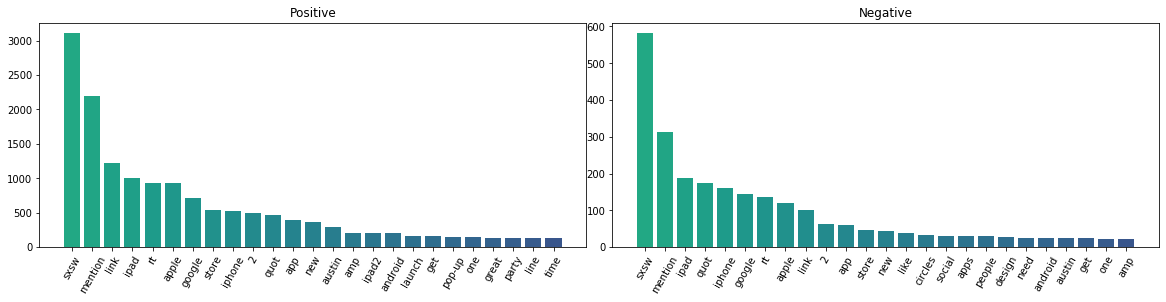

In [216]:
color = cm.viridis_r(np.linspace(.4,.8, 30))
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax.bar(pos_bar_words, pos_bar_counts, color=color)



ax2.bar(neg_bar_words, neg_bar_counts, color=color )

ax.title.set_text('Positive')
ax2.title.set_text('Negative')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)


plt.show()

In [217]:
 ## Create word clouds for visualization
    #!pip install wordcloud
from wordcloud import WordCloud
pos_dictionary = dict(zip(pos_bar_words, pos_bar_counts))
neg_dictionary = dict(zip(neg_bar_words, neg_bar_counts))

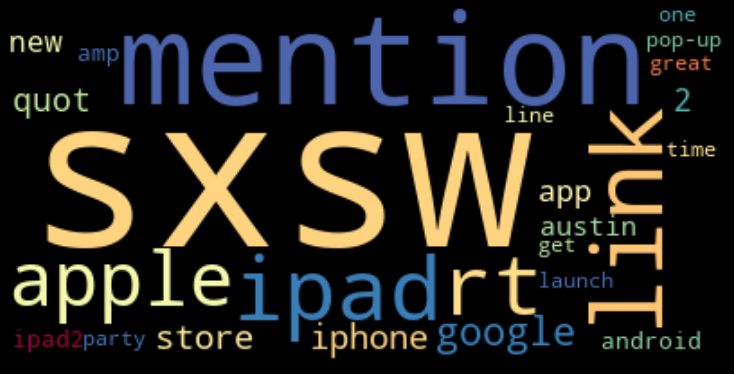

In [218]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(pos_dictionary)


plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)



plt.show()

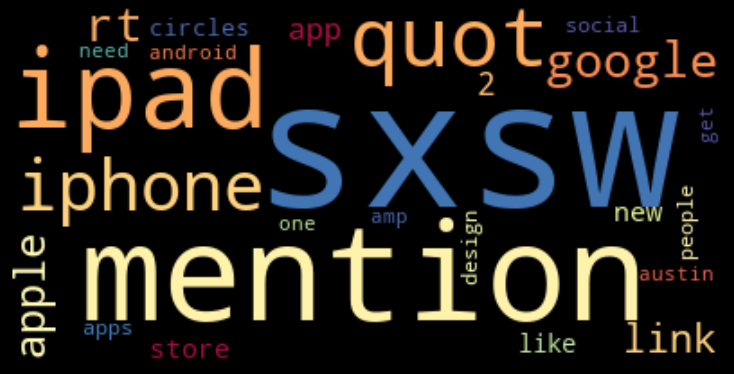

In [219]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(neg_dictionary)


plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)


plt.show()

From the normalized frequencies and visualizations, it is clear that tone and context give more information on the emotion of the tweet than just the most frequent words.

## Explore bigrams

In [220]:
## Find raw frequency
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [221]:
article_finder = BigramCollocationFinder.from_words(articles_concat)

In [222]:
article_scored = article_finder.score_ngrams(bigram_measures.raw_freq)

In [223]:
article_scored[:50]

[(('rt', 'mention'), 0.023476287826028352),
 (('ipad', '2'), 0.010581178532114214),
 (('sxsw', 'link'), 0.007458495271044414),
 (('mention', 'sxsw'), 0.005863455619706603),
 (('sxsw', 'rt'), 0.005661267494889133),
 (('apple', 'store'), 0.005414148675667783),
 (('link', 'sxsw'), 0.004874980342821199),
 (('mention', 'mention'), 0.004066227843551322),
 (('sxsw', 'mention'), 0.003953901107541617),
 (('link', 'rt'), 0.003527059510704738),
 (('iphone', 'app'), 0.003504594163502797),
 (('sxsw', 'apple'), 0.0031002179138678587),
 (('mention', 'google'), 0.0028980297890503896),
 (('store', 'sxsw'), 0.0028306337474445667),
 (('mention', 'apple'), 0.00244872284501157),
 (('via', 'mention'), 0.00244872284501157),
 (('austin', 'sxsw'), 0.002426257497809629),
 (('sxsw', 'ipad'), 0.0023813268034057465),
 (('mention', 'rt'), 0.0023139307617999236),
 (('social', 'network'), 0.0022016040257902187),
 (('pop-up', 'store'), 0.002156673331386337),
 (('new', 'social'), 0.0020892772897805134),
 (('google', 'm

In [224]:
# find pmi score
article_pmi_finder = BigramCollocationFinder.from_words(articles_concat)

In [225]:
article_pmi_finder.apply_freq_filter(1)

In [226]:
article_pmi_scored = article_pmi_finder.score_ngrams(bigram_measures.pmi)

In [227]:
article_pmi_scored

[(("'after", '8pm'), 15.441939115551303),
 (("'dont", 'evil'), 15.441939115551303),
 (("'freak", 'jet'), 15.441939115551303),
 (("'get", 'talib'), 15.441939115551303),
 (("'matt", 'fricking'), 15.441939115551303),
 (("'wait", '2012/3/4/5/'), 15.441939115551303),
 (("'where", 'exceptionally'), 15.441939115551303),
 (('*does*', 'glowing'), 15.441939115551303),
 (('*force', 'chokes'), 15.441939115551303),
 (('*new*', 'www.divasanddorks.com'), 15.441939115551303),
 (('*slips', 'bag*'), 15.441939115551303),
 (('*spark', 'selected'), 15.441939115551303),
 (('*strums', 'guitar*'), 15.441939115551303),
 (('-approach', 'skepticism'), 15.441939115551303),
 (('-but', 'jaloux'), 15.441939115551303),
 (('-maybe', 'wk'), 15.441939115551303),
 (('..lame', 'z'), 15.441939115551303),
 (('.02', 'symbian'), 15.441939115551303),
 (('//itunes.apple.com/us/app/holler-gram/id420666439', 'mt=8'),
  15.441939115551303),
 (('1.6', 'gigs'), 15.441939115551303),
 (('1/4', 'million+'), 15.441939115551303),
 (('100

Since indivual words may not provide enough information, using bigrams in the modeling process may help the model because they help provide more context. I will implement the use of bigrams when I create my models


# Extra EDA

## Build an LDA model to break down the words that are present in each emotion

In [228]:
#!pip install pyLDAvis
import gensim

from nltk.corpus import stopwords
import gensim.corpora as corpora

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [229]:
Data1 = {'tweet':processed_data, 'emotion':target}
df4 = pd.DataFrame(Data1)

In [230]:
negative = df4[df4.emotion != 1]

In [231]:
negative

,tweet,emotion
0,"[wesley83, 3g, iphone, 3, hrs, tweeting, rise_...",0
3,"[sxsw, hope, year, festival, crashy, year, iph...",0
17,"[noticed, dst, coming, weekend, many, iphone, ...",0
38,"[mention, false, alarm, google, circles, comin...",0
64,"[rt, mention, line, apple, store, insane.., sxsw]",0
...,...,...
8973,"[google, guy, sxsw, talk, explaining, made, re...",0
8981,"[think, effing, hubby, line, ipad, 2, someone,...",0
9008,"['m, pretty, sure, panelist, thinks, quot, app...",0
9043,"[hey, anyone, sxsw, signing, group, texting, a...",0


In [232]:

id2word = corpora.Dictionary(negative['tweet'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in negative['tweet']]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [233]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.216184  0.065879       1        1  35.593105
3      0.015962 -0.188860       2        1  28.255837
2      0.062301 -0.003900       3        1  19.001893
0      0.137921  0.126881       4        1  17.149165, topic_info=        Term        Freq       Total Category  logprob  loglift
64      quot  129.000000  129.000000  Default  30.0000  30.0000
33    google  129.000000  129.000000  Default  29.0000  29.0000
34      link  105.000000  105.000000  Default  28.0000  28.0000
4     iphone  126.000000  126.000000  Default  27.0000  27.0000
39     apple   74.000000   74.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
940    world    5.467160    6.183966   Topic4  -5.4098   1.6400
447    point    5.776905    6.623011   Topic4  -5.3547   1.6265
1806     yes    5.751448    6.666856   Topic4  -5.3591   1.6155
9       sxsw   45.462171  465.431156   Topic4  -3.2917  -0.5629
388    sxswi    7.321840   17.616062   Topic4  -5.1177   0.8853

[180 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
61        1  0.939263       'm
82        4  0.927750        1
91        1  0.986569        2
84        1  0.964297  already
596       2  0.922502  america
...     ...       ...      ...
940       4  0.808543    world
322       1  0.948264    would
1806      1  0.149996      yes
1806      4  0.899974      yes
1164      2  0.973279      yet

[167 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

Looking at group one and three in the negative emotion shows a lot of words like; 'suck', 'bad', 'headache' that the model may use to associate a tweet with a negative emotion

In [234]:
positive = df4[df4.emotion != 0]

In [235]:
id2word = corpora.Dictionary(positive['tweet'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in positive['tweet']]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [236]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.164485  0.163195       1        1  29.056152
3     -0.104545 -0.037342       2        1  28.702478
2      0.012601 -0.226435       3        1  28.114402
0      0.256429  0.100583       4        1  14.126968, topic_info=            Term         Freq        Total Category  logprob  loglift
55         apple   785.000000   785.000000  Default  30.0000  30.0000
14             2   539.000000   539.000000  Default  29.0000  29.0000
15          ipad  1106.000000  1106.000000  Default  28.0000  28.0000
22        google   510.000000   510.000000  Default  27.0000  27.0000
115       iphone   483.000000   483.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
191            3    21.899483    22.637720   Topic4  -5.4855   1.9239
912        front    23.984327    24.835215   Topic4  -5.3945   1.9222
641       pretty    35.361990    37.203035   Topic4  -5.0063   1.9063
1375  apparently    29.790606    31.320597   Topic4  -5.1777   1.9070
12          sxsw   176.193369  2830.992870   Topic4  -3.4004  -0.8197

[173 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
130       1  0.995148       'm
1005      1  0.983714      've
1171      2  0.990306       --
511       4  0.989159        1
14        3  0.998170        2
...     ...       ...      ...
173       2  0.984607      win
510       4  0.988135  winning
894       4  0.988563     wish
1143      2  0.974953    would
578       4  0.989535      yes

[153 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

Groups one, two, and three have words like; 'nice', 'want', 'great' that may help the model identify the positive emotion 